 **Name : Indra Awal Priyanto**

**Neptune ID : FDAW78**

**Change Detection on CDN Dataset**

In [1]:
#Download dataset from: https://docs.google.com/spreadsheets/d/14TMBl6tfV2BZ1QQZCs0HeasngNLmnUUn/edit?usp=sharing&ouid=100794820815526789197&rtpof=true&sd=true
!gdown --id 14TMBl6tfV2BZ1QQZCs0HeasngNLmnUUn

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14TMBl6tfV2BZ1QQZCs0HeasngNLmnUUn
To: /content/data.xlsx
100% 17.4M/17.4M [00:00<00:00, 137MB/s]


In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import ipywidgets as widgets

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import tensorflow as tf 
import sys
import missingno as mno
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Import Dataset

In [4]:
data_xls = pd.read_excel('data.xlsx', 'cdn_customer_qoe_anon', dtype=str, index_col=None)
data_xls.to_csv('data.csv', encoding='utf-8', index=False)

In [5]:
df = pd.read_csv("data.csv", parse_dates=["Start Time", "End Time"])
df.head()

,Column1,Start Time,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,CDN Node Host,Connection Type,Device,Device Type,Browser,Browser Version,OS,OS Version,Device ID,Happiness Value,Happiness Score,Playback Stalls,Startup Error (Count),Latency,End Time,Crash Status,End of Playback Status,User_ID_N,Title_N,Program_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
0,0,2022-07-12 00:00:14,11,10,0,0.879,0.0,NaN,Ethernet-100,Android TV,TV,Android Browser,Android Browser,Android,Android 10,186ba46d-4400-39df-8693-1ca9d25caf48,Smile (7-8.5),7.393,0.0,0,19504,2022-10-04 00:00:26,NaN,On Stop,564,784,0,16,64,2672,3,263,0
1,1,2022-07-12 00:00:38,73,72,0,1.170,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,35f76782-6990-3fa2-bdb8-0f35a2c5569c,Happy (8.5-10),9.399,0.0,0,19033,2022-10-04 00:01:52,NaN,On Stop,480,1,0,13,63,2672,3,76,0
2,2,2022-07-12 00:02:02,21,20,0,1.133,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,16846b9d-4bd6-3b16-a464-cb99378f3249,Neutral (5-7),6.999,0.0,0,19071,2022-10-04 00:02:24,NaN,On Stop,346,786,0,13,63,2672,3,76,0
3,3,2022-07-12 00:02:24,1,0,0,0.000,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,16846b9d-4bd6-3b16-a464-cb99378f3249,Angry (0-3),0.000,0.0,0,0,2022-10-04 00:02:26,NaN,On Stop,346,997,0,13,63,2672,3,76,0
4,4,2022-07-12 00:02:25,1,0,0,0.000,0.0,NaN,WiFi-5,Android TV,TV,Android Browser,Android Browser,Android,Android 10,16846b9d-4bd6-3b16-a464-cb99378f3249,Angry (0-3),0.000,0.0,0,0,2022-10-04 00:02:28,NaN,On Stop,346,997,0,13,63,2672,3,76,0


In [6]:
df["Start Time"].min(), df["Start Time"].max()

(Timestamp('2022-07-12 00:00:14'), Timestamp('2022-07-25 23:59:56'))

In [7]:
df["End Time"].min(), df["End Time"].max()

(Timestamp('2022-10-04 00:00:26'), Timestamp('2022-10-18 11:11:06'))

In [8]:
df.isna().sum()

Column1                        0
Start Time                     0
Playtime                       0
Effective Playtime             0
Interruptions                  0
Join Time                      0
Buffer Ratio                   0
CDN Node Host              65277
Connection Type                0
Device                         0
Device Type                    0
Browser                        0
Browser Version              845
OS                             0
OS Version                     0
Device ID                      0
Happiness Value                1
Happiness Score                0
Playback Stalls                0
Startup Error (Count)          0
Latency                        0
End Time                       0
Crash Status              100411
End of Playback Status         1
User_ID_N                      0
Title_N                        0
Program_N                      0
Device_Vendor_N                0
Device_Model_N                 0
Content_TV_Show_N              0
Country_N 

In [9]:
df = df.drop(["Column1", "Effective Playtime", "CDN Node Host", "Browser Version", "Device ID", "Happiness Value", 
              "End of Playback Status", "Program_N", "End Time",], axis = 1)
df["Crash Status"] = df["Crash Status"].astype('category')
df["Crash Status"] = df["Crash Status"].cat.add_categories("No Error Crash").fillna("No Error Crash")
df["Crash Status"] = df["Crash Status"].astype('object')
df.isna().sum()

Start Time               0
Playtime                 0
Interruptions            0
Join Time                0
Buffer Ratio             0
Connection Type          0
Device                   0
Device Type              0
Browser                  0
OS                       0
OS Version               0
Happiness Score          0
Playback Stalls          0
Startup Error (Count)    0
Latency                  0
Crash Status             0
User_ID_N                0
Title_N                  0
Device_Vendor_N          0
Device_Model_N           0
Content_TV_Show_N        0
Country_N                0
City_N                   0
Region_N                 0
dtype: int64

In [10]:
df.nunique()

Start Time               96503
Playtime                  4752
Interruptions               43
Join Time                 5554
Buffer Ratio              2076
Connection Type             19
Device                      15
Device Type                 13
Browser                     15
OS                           9
OS Version                  78
Happiness Score           6534
Playback Stalls            425
Startup Error (Count)        2
Latency                  13416
Crash Status                 3
User_ID_N                  700
Title_N                   1639
Device_Vendor_N             25
Device_Model_N             164
Content_TV_Show_N         2747
Country_N                   15
City_N                     406
Region_N                     2
dtype: int64

In [11]:
df.dtypes

Start Time               datetime64[ns]
Playtime                          int64
Interruptions                     int64
Join Time                       float64
Buffer Ratio                    float64
Connection Type                  object
Device                           object
Device Type                      object
Browser                          object
OS                               object
OS Version                       object
Happiness Score                 float64
Playback Stalls                 float64
Startup Error (Count)             int64
Latency                           int64
Crash Status                     object
User_ID_N                         int64
Title_N                           int64
Device_Vendor_N                   int64
Device_Model_N                    int64
Content_TV_Show_N                 int64
Country_N                         int64
City_N                            int64
Region_N                          int64
dtype: object

In [12]:
import plotly.express as px 

fig = px.line(df, x="Start Time", y="Playtime")
fig

In [13]:
df.set_index("Start Time", inplace=True)

In [14]:
for i in df.select_dtypes('object').columns:
  le = LabelEncoder().fit(df[i])
  df[i] = le.transform(df[i]) 

df.head()

,Playtime,Interruptions,Join Time,Buffer Ratio,Connection Type,Device,Device Type,Browser,OS,OS Version,Happiness Score,Playback Stalls,Startup Error (Count),Latency,Crash Status,User_ID_N,Title_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
Start Time,,,,,,,,,,,,,,,,,,,,,,,
2022-07-12 00:00:14,11,0,0.879,0.0,7,1,10,0,0,0,7.393,0.0,0,19504,1,564,784,16,64,2672,3,263,0
2022-07-12 00:00:38,73,0,1.170,0.0,16,1,10,0,0,0,9.399,0.0,0,19033,1,480,1,13,63,2672,3,76,0
2022-07-12 00:02:02,21,0,1.133,0.0,16,1,10,0,0,0,6.999,0.0,0,19071,1,346,786,13,63,2672,3,76,0
2022-07-12 00:02:24,1,0,0.000,0.0,16,1,10,0,0,0,0.000,0.0,0,0,1,346,997,13,63,2672,3,76,0
2022-07-12 00:02:25,1,0,0.000,0.0,16,1,10,0,0,0,0.000,0.0,0,0,1,346,997,13,63,2672,3,76,0


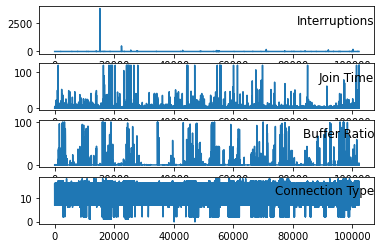

In [15]:
from matplotlib import pyplot

values = df.values
# specify columns to plot
groups = [1, 2, 3, 4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [16]:
df.describe()

,Playtime,Interruptions,Join Time,Buffer Ratio,Connection Type,Device,Device Type,Browser,OS,OS Version,Happiness Score,Playback Stalls,Startup Error (Count),Latency,Crash Status,User_ID_N,Title_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
count,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000
mean,328.965479,0.099544,1.158462,0.261755,12.391116,2.391889,8.690757,0.859470,0.831179,5.934243,5.166843,0.003805,0.013564,13360.818788,1.006914,392.976686,809.658494,13.127699,69.461704,2421.410568,3.933021,150.772669,0.027676
std,1799.357645,12.007473,2.843884,3.568773,4.246433,3.569991,2.438083,2.354904,1.921155,14.757550,4.381398,0.202198,0.115673,23550.856009,0.134147,161.309073,527.743379,4.624751,33.347175,631.704165,2.546806,107.740597,0.164043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.583000,0.000000,7.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,295.000000,261.000000,13.000000,63.000000,2672.000000,3.000000,76.000000,0.000000
50%,22.000000,0.000000,0.790000,0.000000,15.000000,1.000000,10.000000,0.000000,0.000000,0.000000,6.646500,0.000000,0.000000,17862.000000,1.000000,383.000000,997.000000,15.000000,64.000000,2672.000000,3.000000,76.000000,0.000000
75%,90.000000,0.000000,1.302000,0.000000,16.000000,1.000000,10.000000,0.000000,0.000000,0.000000,9.607000,0.000000,0.000000,19235.000000,1.000000,487.000000,1170.250000,16.000000,64.000000,2672.000000,3.000000,240.000000,0.000000
max,86404.000000,3786.000000,120.000000,100.000000,18.000000,14.000000,12.000000,14.000000,8.000000,77.000000,10.000000,44.408000,1.000000,359477.000000,2.000000,699.000000,1638.000000,24.000000,163.000000,2746.000000,14.000000,405.000000,1.000000


In [17]:
# convert int and float64 columns to float32
intcols = list(df.dtypes[df.dtypes == np.int64].index)
df[intcols] = df[intcols].applymap(np.float32)

f64cols = list(df.dtypes[df.dtypes == np.float64].index)
df[f64cols] = df[f64cols].applymap(np.float32)

f32cols = list(df.dtypes[df.dtypes == np.float32].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102256 entries, 2022-07-12 00:00:14 to 2022-07-25 14:07:08
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Playtime               102256 non-null  float32
 1   Interruptions          102256 non-null  float32
 2   Join Time              102256 non-null  float32
 3   Buffer Ratio           102256 non-null  float32
 4   Connection Type        102256 non-null  float32
 5   Device                 102256 non-null  float32
 6   Device Type            102256 non-null  float32
 7   Browser                102256 non-null  float32
 8   OS                     102256 non-null  float32
 9   OS Version             102256 non-null  float32
 10  Happiness Score        102256 non-null  float32
 11  Playback Stalls        102256 non-null  float32
 12  Startup Error (Count)  102256 non-null  float32
 13  Latency                102256 non-null  float32
 14  Cr

In [18]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
  names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
  if i == 0:
   names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
  else:
   names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg

In [19]:
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,45]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.000127        0.0   0.007325        0.0   0.388889   0.071429   
2   0.000845        0.0   0.009750        0.0   0.888889   0.071429   
3   0.000243        0.0   0.009442        0.0   0.888889   0.071429   
4   0.000012        0.0   0.000000        0.0   0.888889   0.071429   
5   0.000012        0.0   0.000000        0.0   0.888889   0.071429   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.833333        0.0        0.0         0.0    0.763000         0.0   
2   0.833333        0.0        0.0         0.0    0.945364         0.0   
3   0.833333        0.0        0.0         0.0    0.727182         0.0   
4   0.833333        0.0        0.0         0.0    0.090909         0.0   
5   0.833333        0.0        0.0         0.0    0.090909         0.0   

   var13(t-1)  var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  var18(t-1)  \
1         0.0    0.054257         0.5    0.806867  

In [20]:
df.shape

(102256, 23)

In [21]:
reframed.shape

(102255, 24)

In [22]:
 tr = len(df.index)*0.8
tr

81804.8

In [23]:
ts = len(df.index)-81805
ts

20451

In [24]:
values = reframed.values
tr = 81805
ts = len(df.index) - 81805
train = values[:tr, :]
test = values[tr:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(81805, 1, 23) (81805,) (20450, 1, 23) (20450,)


In [25]:
adam = Adam(learning_rate=0.001)
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [26]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
1137/1137 - 7s - loss: 0.0055 - val_loss: 0.0074 - 7s/epoch - 6ms/step
Epoch 2/50
1137/1137 - 7s - loss: 0.0045 - val_loss: 0.0046 - 7s/epoch - 6ms/step
Epoch 3/50
1137/1137 - 8s - loss: 0.0044 - val_loss: 0.0046 - 8s/epoch - 7ms/step
Epoch 4/50
1137/1137 - 8s - loss: 0.0044 - val_loss: 0.0046 - 8s/epoch - 7ms/step
Epoch 5/50
1137/1137 - 7s - loss: 0.0042 - val_loss: 0.0048 - 7s/epoch - 6ms/step
Epoch 6/50
1137/1137 - 6s - loss: 0.0042 - val_loss: 0.0045 - 6s/epoch - 5ms/step
Epoch 7/50
1137/1137 - 5s - loss: 0.0041 - val_loss: 0.0051 - 5s/epoch - 5ms/step
Epoch 8/50
1137/1137 - 4s - loss: 0.0041 - val_loss: 0.0041 - 4s/epoch - 3ms/step
Epoch 9/50
1137/1137 - 4s - loss: 0.0040 - val_loss: 0.0052 - 4s/epoch - 3ms/step
Epoch 10/50
1137/1137 - 4s - loss: 0.0040 - val_loss: 0.0041 - 4s/epoch - 3ms/step
Epoch 11/50
1137/1137 - 4s - loss: 0.0040 - val_loss: 0.0043 - 4s/epoch - 3ms/step
Epoch 12/50
1137/1137 - 4s - loss: 0.0039 - val_loss: 0.0041 - 4s/epoch - 3ms/step
Epoch 13/50
1

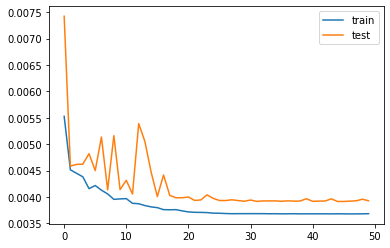

In [27]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [29]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]


640/640 [==============================] - 2s 2ms/step


In [30]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1998.546


Change Detection Using CUSUM Alghorithm

In [32]:
import torch
import numpy as np
from typing import Tuple


class CusumMeanDetector():
        
    def __init__(self, t_warmup = 30, p_limit = 0.01) -> None:
        self._t_warmup = t_warmup
        self._p_limit = p_limit
        
        self._reset()
        
        

    def predict_next(self, y: torch.tensor) -> Tuple[float,bool]:
        self._update_data(y)

        if self.current_t == self._t_warmup:
            self._init_params()
        
        if self.current_t >= self._t_warmup:
            prob, is_changepoint = self._check_for_changepoint()
            if is_changepoint:
                self._reset()

            return (1-prob), is_changepoint
        
        else:
            return 0, False
            
    
    def _reset(self) -> None:
        self.current_t = torch.zeros(1)
                
        self.current_obs = []
        
        self.current_mean = None
        self.current_std = None
            
    
    def _update_data(self, y: torch.tensor) -> None:
        self.current_t += 1
        self.current_obs.append(y.reshape(1))

        
    
    def _init_params(self) -> None:
        self.current_mean = torch.mean(torch.concat(self.current_obs))
        self.current_std = torch.std(torch.concat(self.current_obs))
             
    
    def _check_for_changepoint(self) -> Tuple[float,bool]:
        standardized_sum = torch.sum(torch.concat(self.current_obs) - self.current_mean)/(self.current_std * self.current_t**0.5)
        prob = float(self._get_prob(standardized_sum).detach().numpy())
        
        return prob, prob < self._p_limit
    
    
    def _get_prob(self, y: torch.tensor) -> bool:
        p = torch.distributions.normal.Normal(0,1).cdf(torch.abs(y))
        prob = 2*(1 - p)
        
        return prob

In [33]:
y = torch.tensor(inv_yhat["Playtime"].values)

test = CusumMeanDetector()
outs = [test.predict_next(y[i]) for i in range(len(y))]



cps = np.where(list(map(lambda x: x[1], outs)))[0]
probs = np.array(list(map(lambda x: x[0], outs)))

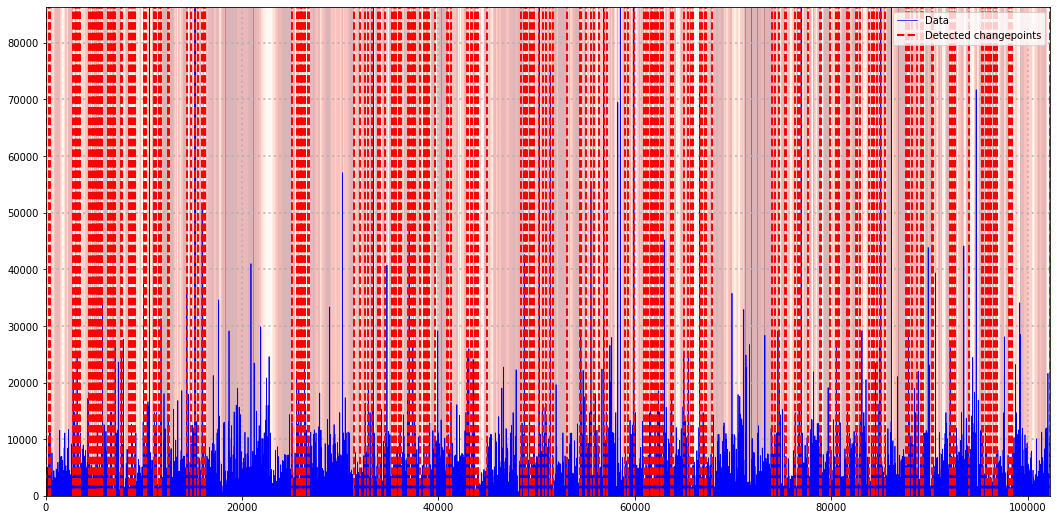

In [35]:
X, Y = np.meshgrid(np.arange(len(y)),np.linspace(torch.min(y).detach().numpy(),torch.max(y).detach().numpy()))
Z = probs[X]


plt.figure(figsize=(18,9))
plt.contourf(X,Y,Z,alpha=0.3,cmap="Reds")
plt.plot(np.arange(len(y)),y.detach().numpy(),lw=0.75,label="Data",color="blue")


plt.axvline(cps[0], color="red", linestyle="dashed",label="Detected changepoints",lw=2)
[plt.axvline(cp, color="red", linestyle="dashed",lw=2) for cp in cps[1:]]

plt.grid(alpha=0.75, linestyle="dotted",lw=2)

plt.legend()